# Fuzzed vs Vanilla flight path analysis

# Fuzzed vs Vanilla flight path analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fastdtw import fastdtw

### We generate the csv files via the ulog2csv utility and target the vehicle_local_position message

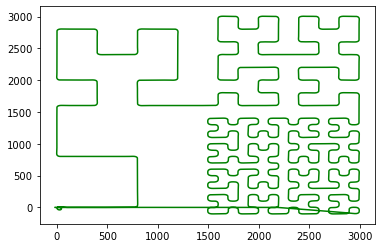

In [2]:
vanilla_pos_df = pd.read_csv("rcac_autopilot/vanilla/vl0_vehicle_local_position_0.csv")
plt.plot(vanilla_pos_df["y"], vanilla_pos_df["x"], "g")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

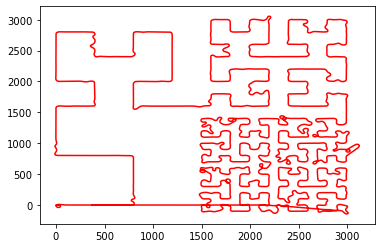

In [4]:
fuzzed_pos_df = pd.read_csv("rcac_autopilot/fuzzed/fzl0_vehicle_local_position_0.csv")
plt.plot(fuzzed_pos_df["y"], fuzzed_pos_df["x"], "r")
plt.show

In [5]:
def df2path(df):
    return np.transpose(np.stack((df["x"], df["y"])))

def log2path_standard(isVanilla, index):
    """Takes vanilla or fuzzed index and returns a 2d array of x,y coordinates"""
    prefix = "standard_autopilot/vanilla/vl" if isVanilla else "standard_autopilot/fuzzed/fzl"
    pdf = pd.read_csv(prefix + str(index) + "_vehicle_local_position_0.csv")
    return df2path(pdf)

def log2path_rcac(isVanilla, index):
    """Takes vanilla or fuzzed index and returns a 2d array of x,y coordinates"""
    prefix = "rcac_autopilot/vanilla/vl" if isVanilla else "rcac_autopilot/fuzzed/fzl"
    pdf = pd.read_csv(prefix + str(index) + "_vehicle_local_position_0.csv")
    return df2path(pdf)

In [6]:
vanilla_path  = log2path_rcac(True, 0)
fuzzed_path  = log2path_rcac(False, 0)
vf_distance, vf_path = fastdtw(vanilla_path, fuzzed_path)
print(vf_distance)

392289.87679127895


### Now we can construct a similarity matrix with the dynamic-time-warping as a distance metric
The matrix will be upper-triangular with 0s along the diagnonal as in the example below